# Sentiment Comparison: Viusal vs. Textual

This notebook creates a dataframe, which has the columns id, **Visual_Sentiment** - which was generated from OpenAI *gpt-4-vision-preview* - and **Textual_Sentiment** - which was generated from the OpenAI *gpt-3.5.-turbo model*.

Then a [chi-square test of independence](https://www.scribbr.com/statistics/chi-square-tests/) is used to test whether the two categorical (nominal) variables are related to each other.

For this the



## Preparing the dataframe

Mount Drive and read data. Create Dataframe with important columns.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Klimawandel Projekt/Daten/total.csv', sep=",")

In [3]:
df.head(2)

,id,Filename,Account,body,language,Hashtag,Sentiment,Correlation_to_the_topic,Type_of_media_content,Impression_or_Sentiment,...,Education_Facts_or_News,BERTopic,platform,mean_h,mean_s,mean_v,dominant_h,dominant_s,dominant_v,max_colorname
0,climatechange_1,climatechange_1.jpg,NASA Earth,Not your typical ice cube. 🧊\n\nAlthough it is...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,True,2_ice_gletscher_schnee_antarktis,instagram,0.635294,0.07451,0.65098,0.635294,0.07451,0.65098,gray
1,climatechange_2,climatechange_2.jpg,NASA,Not your typical ice cube. 🧊\n\nAlthough it is...,Language.ENGLISH,climatechange,neutral,True,Photo,Neutral,...,True,2_ice_gletscher_schnee_antarktis,instagram,0.635294,0.07451,0.65098,0.635294,0.07451,0.65098,gray


In [4]:
len(df)

6905

In [5]:
sentiment_df = df[["id", "Sentiment", "Impression_or_Sentiment" ]]

In [6]:
sentiment_df = sentiment_df.rename(columns={'Sentiment': 'Text_Sentiment', 'Impression_or_Sentiment': 'Visual_Sentiment'})


In [7]:
sentiment_df['Visual_Sentiment'] = sentiment_df['Visual_Sentiment'].apply(lambda x: x.lower() if isinstance(x, str) else x)

In [8]:
sentiment_df.head()

,id,Text_Sentiment,Visual_Sentiment
0,climatechange_1,neutral,neutral
1,climatechange_2,neutral,neutral
2,climatechange_3,positive,negative
3,climatechange_4,neutral,neutral
4,climatechange_5,positive,neutral


In [9]:
sentiment_df.to_csv("sentiment_analysis_df.csv")

## Counts of equal values

In [10]:
# Count occurrences of sentiments in Visual_Sentiment column
visual_sentiment_counts = sentiment_df['Visual_Sentiment'].value_counts()

# Count occurrences of sentiments in Text_Sentiment column
text_sentiment_counts = sentiment_df['Text_Sentiment'].value_counts()

# Output the counts
print("Occurrences of sentiments in Visual_Sentiment:")
print(visual_sentiment_counts)
print("\nOccurrences of sentiments in Text_Sentiment:")
print(text_sentiment_counts)

Occurrences of sentiments in Visual_Sentiment:
neutral     3409
negative    2515
positive     973
Name: Visual_Sentiment, dtype: int64

Occurrences of sentiments in Text_Sentiment:
neutral     3186
positive    1978
negative    1741
Name: Text_Sentiment, dtype: int64


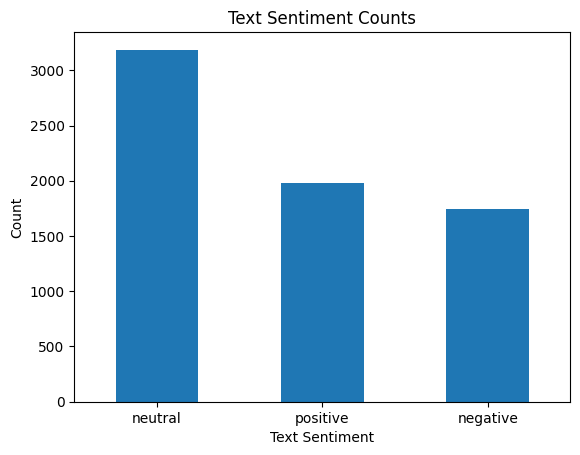

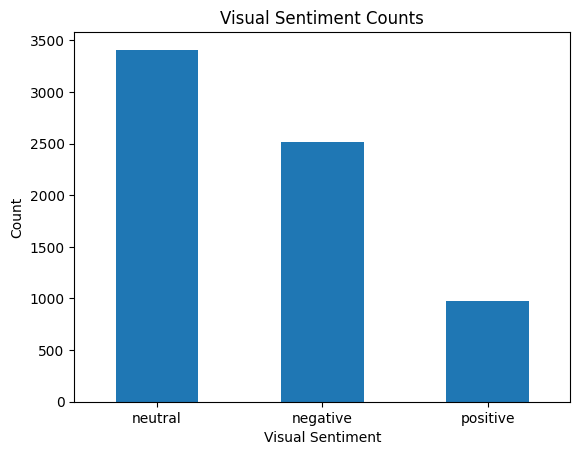

In [11]:
import matplotlib.pyplot as plt


# Show Textual Sentiments
# Create a bar chart
text_sentiment_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Text Sentiment')
plt.ylabel('Count')
plt.title('Text Sentiment Counts')
plt.xticks(rotation=360)

# Save as jpg
plt.savefig('text_sentiments_total.jpg')
# Show the plot
plt.show()


# Show Visual Sentiments
# Create a bar chart
visual_sentiment_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Visual Sentiment')
plt.ylabel('Count')
plt.title('Visual Sentiment Counts')
plt.xticks(rotation=360)

# Save as jpg
plt.savefig('visual_sentiments_total.jpg')
# Show the plot
plt.show()

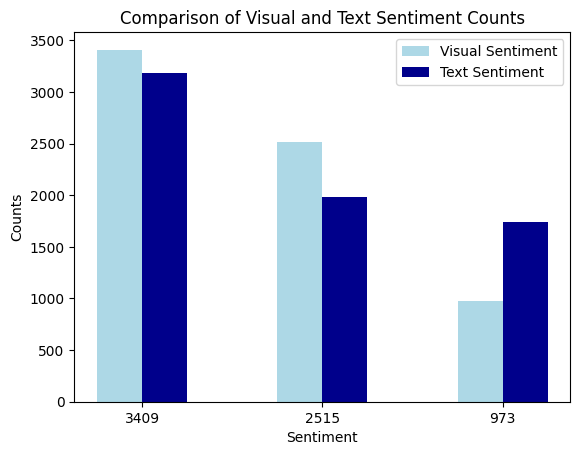

In [12]:
# Show comparison of visual and textual sentiments
import numpy as np

# Define the positions for the bars
bar_width = 0.25
bar_positions_visual = np.arange(len(visual_sentiment_counts))
bar_positions_text = bar_positions_visual + bar_width

# Create a figure and axis object
fig, ax = plt.subplots()

# Plot visual sentiment counts
ax.bar(bar_positions_visual, visual_sentiment_counts, width=bar_width, color='lightblue', label='Visual Sentiment')

# Plot text sentiment counts
ax.bar(bar_positions_text, text_sentiment_counts, width=bar_width, color='darkblue', label='Text Sentiment')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions_visual + bar_width / 2)
ax.set_xticklabels(visual_sentiment_counts)

# Add labels and title
ax.set_xlabel('Sentiment')
ax.set_ylabel('Counts')
ax.set_title('Comparison of Visual and Text Sentiment Counts')
ax.legend()


plt.savefig('comparing_sentiments_total.jpg')
# Show the plot
plt.show()




In [13]:
# Check how often the sentiments are equal between text and visual content
matched_sentiments_count = (sentiment_df['Text_Sentiment'] == sentiment_df['Visual_Sentiment'])

# Calculate the percentage of matched sentiments
percentage_matched_sentiments = matched_sentiments_count.sum() / len(sentiment_df) * 100

print(f"Percentage of posts with matching sentiments between text and visual content: {percentage_matched_sentiments:.2f}%")


Percentage of posts with matching sentiments between text and visual content: 53.54%


In [14]:
# Count occurrences of same sentiments
same_sentiments_count = {
    'positive': ((sentiment_df['Text_Sentiment'] == 'positive') & (sentiment_df['Visual_Sentiment'] == 'positive')).sum(),
    'neutral': ((sentiment_df['Text_Sentiment'] == 'neutral') & (sentiment_df['Visual_Sentiment'] == 'neutral')).sum(),
    'negative': ((sentiment_df['Text_Sentiment'] == 'negative') & (sentiment_df['Visual_Sentiment'] == 'negative')).sum()
}

# Output the counts
print("Number of rows with same sentiments:")
print("Positive:", same_sentiments_count['positive'])
print("Neutral:", same_sentiments_count['neutral'])
print("Negative:", same_sentiments_count['negative'])


Number of rows with same sentiments:
Positive: 679
Neutral: 1916
Negative: 1102


In [15]:
# Calculate total number of rows
total_rows = len(sentiment_df)

# Count occurrences of same sentiments
same_sentiments_count = {
    'positive': ((sentiment_df['Text_Sentiment'] == 'positive') & (sentiment_df['Visual_Sentiment'] == 'positive')).sum(),
    'neutral': ((sentiment_df['Text_Sentiment'] == 'neutral') & (sentiment_df['Visual_Sentiment'] == 'neutral')).sum(),
    'negative': ((sentiment_df['Text_Sentiment'] == 'negative') & (sentiment_df['Visual_Sentiment'] == 'negative')).sum()
}

# Calculate percentages
same_sentiments_percentage = {key: (value / total_rows * 100) for key, value in same_sentiments_count.items()}

# Output the percentages
print("Percentage of rows with same sentiments:")
print("Positive:", same_sentiments_percentage['positive'], "%")
print("Neutral:", same_sentiments_percentage['neutral'], "%")
print("Negative:", same_sentiments_percentage['negative'], "%")


Percentage of rows with same sentiments:
Positive: 9.833454018826938 %
Neutral: 27.74800868935554 %
Negative: 15.959449674149168 %


## Chi-Square Test of Independence

In [22]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(sentiment_df['Text_Sentiment'], sentiment_df['Visual_Sentiment'])

# Perform chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Output the results
print("Chi-square Statistic:", chi2)
print("P-value:", p_value)

# Check the significance level
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between Text_Sentiment and Visual_Sentiment.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between Text_Sentiment and Visual_Sentiment.")


Chi-square Statistic: 1502.619434709618
P-value: 0.0
Reject the null hypothesis. There is a significant association between Text_Sentiment and Visual_Sentiment.


###  Pearson's Chi-squared test in R

As the P-value is 0.0 in Python, the same analysis with conducted in R to get the specific value:




```
> sentiment_df <- read_csv("sentiment_analysis_df.csv")
> View(sentiment_df)
> chi_sq_test <- chisq.test(sentiment_df$Text_Sentiment, sentiment_df$Visual_Sentiment)
> print(chi_sq_test)
```




The output was:

```
        Pearson's Chi-squared test

sentiment_df:  sentiment_df$Text_Sentiment and sentiment_df$Visual_Sentiment
X-squared = 1502.6, df = 4, p-value < 2.2e-16
```



The **X-squared = 1502.6**, which measures the discrepancy between the observed counts in the contigency table and the counts that would be expeted if the two variables were independent, inicates that there may be a siginficant association between the Visual and the Textual Sentiment.


The **p-value < 2.2e-16** suggests stronge evidence against the null hypothesis. It indeicates that the observed association between 'Text_Sentiment' and 'Visual_Sentiment' is highly unlikly to have occureed by chance.

**Hypothesis Conclusion**

Based on the significance level, α = 0.05:

```
p-value < α
```

the null hypothesis is rejected.

****
**->There is a significant assiciation between the Textual Sentiment and the Visual Sentiment of and Instagram or TikTok Post. They are assciated with each other.**